# CS: GO win/loss prediction with feature importance for user retention through better matchmaking

## Introduction

Counter Strike Go (CS:GO) is a multiplayer first-person shooter video game developed by Hidden Path Entertainment and Valve Corporation. The game pits two teams against each other: the Terrorists and the Counter-Terrorists. Both sides are tasked with eliminating the other while also completing separate objectives, the Terrorists, depending on the game mode, must either plant the bomb or defend the hostages, while the Counter-Terrorists must either prevent the bomb from being planted, defuse the bomb, or rescue the hostages. There are eight game modes, all of which have distinct characteristics specific to that mode. [1]


Global Offensive has matchmaking support that allows players to play on dedicated Valve servers, as well as allowing members of the community to host their own servers with custom maps and game modes. Global Offensive has a competitive scene, with Valve-sponsored tournaments being the premier competitive events for the game. 

## Machine Learning

Machine learning is the science of getting computers to act without being explicitly programmed. In the past decade, machine learning has given us self-driving cars, practical speech recognition, effective web search, and a vastly improved understanding of the human genome. Machine learning is so pervasive today that you probably use it dozens of times a day without knowing it. Many researchers also think it is the best way to make progress towards human-level AI. In this class, you will learn about the most effective machine learning techniques, and gain practice implementing them and getting them to work for yourself.

It consists of 
- Supervised learning (parametric/non-parametric algorithms, support vector machines, kernels, neural networks).
- Unsupervised learning (clustering, dimensionality reduction, recommender systems, deep learning).
- Best practices in machine learning (bias/variance theory; innovation process in machine learning and AI).

## Why &  How

The objective is to have players stay in servers as long as possible. We want to maximize the user retention on valve servers and give the players a good gaming experience. The way to do that is two-fold: Matches are evenly established. Secondly, there are no cheaters. Valve runs Valve Anti-Cheat to prevent cheating. So this project will be focusing on better matchmaking. To achieve this we must employ a better matchmaking system which pitches the player of similar standards.

In a regular server the teams are shuffled almost after every game. If the servers detect that the games are too short or the teams are unevenly matched we would need to shuffle the teams appropriately, now this is where the features will be important in deciding which players need to be employed to the other team. On completion of the maps win/loss prediction would be essential in forming the next batch of teams.

## Prerequisites


### Installing Python

Get the latest version on Python from https://www.python.org/downloads/

Depending on the OS install the recommended and most stable version of Python.

Ensure Python is correctly installed:

On Windows : 
    
    On Start -> cmd (Open command prompt) -> Python -V

On Mac/Linux : 
    
    terminal -> Python -V


### Installing Pip or Anaconda

We would need a distribution software for our external libraries. I personally prefer pip but Anaconda could be used as well. 

Download latest pip from https://pip.pypa.io/en/stable/installing/

From the selected downloads folder, run the downloaded pip file with command 
    
    python get-pip.py
    pip -v 

To ensure that pip was installed correctly.

To install Anaconda visit https://conda.io/docs/user-guide/install/index.html

Installation is pretty straightforward based on the operating system.


### Installing Jupyter Notebook

run command:
    
    pip3 install jupyter
    
### Installing Tensor Flow

    python3 -m pip install
    
### Installing h2o.ai

H2O is open-source software for big-data analysis. It is produced by the company H2O.ai. H2O allows users to fit thousands of potential models as part of discovering patterns in data. The H2O software runs can be called from the statistical package R, Python, and other environments. It is used for exploring and analyzing datasets held in cloud computing systems and in the Apache Hadoop Distributed File System as well as in the conventional operating-systems Linux, macOS, and Microsoft Windows. The H2O software is written in Java, Python, and R. Its graphical-user interface is compatible with four browsers: Chrome, Safari, Firefox, and Internet Explorer. [7]

If using browser cloud interface could be downloaded at https://www.h2o.ai/download/

If using in python notebook


In [1]:
import h2o
from h2o.automl import H2OAutoML

h2o.init(strict_version_check=False) # start h2o

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.111-b14, mixed mode, sharing)


c:\program files\python36\lib\site-packages\h2o\backend\server.py:331: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Starting server from c:\program files\python36\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Gautam\AppData\Local\Temp\tmpxnr1tsq5
  JVM stdout: C:\Users\Gautam\AppData\Local\Temp\tmpxnr1tsq5\h2o_Gautam_started_from_python.out
  JVM stderr: C:\Users\Gautam\AppData\Local\Temp\tmpxnr1tsq5\h2o_Gautam_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.5
H2O cluster version age:,8 days
H2O cluster name:,H2O_from_python_Gautam_xhs5q0
H2O cluster total nodes:,1
H2O cluster free memory:,247.5 Mb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


## Dataset

 Download the Kaggle dataset from 
 
 https://www.kaggle.com/skihikingkevin/csgo-matchmaking-damage/kernels?sortBy=dateRun&group=upvoted&pageSize=20&datasetId=2644
 
 This dataset within the 1400 matches provides every successful entry of duels (or battle) that took place for a player. That is, each row documents an event when a player is hurt by another player (or World e.g fall damage). There are over 900,000 entries within more than 31500 rounds.

mm_master_demos.csv contains information on rounds fired, while mm_grenades_demos.csv contains information on grenades thrown. The fields in the two datasets are similar: highlights include shooters and victims, event coordinates, and timestamps. The datasets also includes static information on the match winner, player ranks before and after the match, and other miscellaneous match-level metadata.

 The dataset has lots 3 csv files of various map locations data, gun dataset and a granade dataset. We will prmarily be using the gun dataset named 'mm_master_demos.csv'.
 
 ### The dataset looks something like this:
 

In [1]:
import pandas as pd
import numpy as np

csgo = pd.read_csv('mm_master_demos.csv', sep=',', encoding='utf-8', header= 0)

csgo.head()

,Unnamed: 0,file,map,date,round,tick,seconds,att_team,vic_team,att_side,...,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,0,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8482,133.0582,Team 1,Team 2,CounterTerrorist,...,76561198123082770,17,1473.847,1351.358,662.170,772.748,PISTOL_ROUND,2950,3850,16.0
1,1,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8600,134.9023,Team 1,Team 2,CounterTerrorist,...,76561198051040004,17,-1211.723,1060.813,-1184.006,1153.343,PISTOL_ROUND,2950,3850,16.0
2,2,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8610,135.0586,Team 2,Team 1,Terrorist,...,76561198223006752,16,-1153.584,1163.131,-1198.015,1050.423,PISTOL_ROUND,2950,3850,16.0
3,3,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8624,135.2774,Team 1,Team 2,CounterTerrorist,...,76561198051040004,17,-1173.053,1044.365,-1141.785,1190.089,PISTOL_ROUND,2950,3850,16.0
4,4,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8632,135.4024,Team 2,Team 1,Terrorist,...,76561198223006752,16,-1142.522,1200.967,-1157.690,1050.702,PISTOL_ROUND,2950,3850,16.0


## Parsing dataset 


<img src="h2o-screenshots/parse1.png">
<img src="h2o-screenshots/parse2.png">

# Correlation Heatmap

A heat map is a two-dimensional representation of data in which values are represented by colors. A simple heat map provides an immediate visual summary of information. More elaborate heat maps allow the viewer to understand complex data sets.

We want to avoid the features in our models which are highly correlated to the target as well as among themselves to get better picture of how the model is situated.

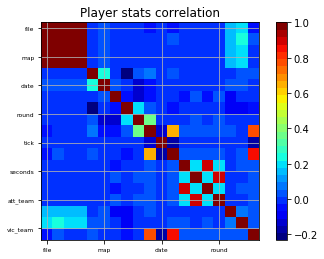

In [21]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Player stats correlation')
    pd.options.display.max_columns = None
    labels = df.head()
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax)
    plt.show()
    
correlation_matrix(csgo)

# Distribution

The normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a very common continuous probability distribution. Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.

We want to know how the data is spread out and there are no issues of scaling. If one of the features is in thousands and the other is in decimals the higher order feature will dominate the scaling. So we want our distribution to be normal.

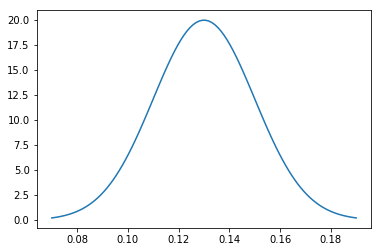

In [2]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import warnings

warnings.filterwarnings("ignore",category=mlab.cbook.mplDeprecation)

mu = 0.13
sigma = 0.02
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

# h2o.ai employed models 

- Generalized Linear Models
- Distributed Random Forest
- Gradient Boosting Machines
- Naive Bayes
- Deep Learning 
- Stacked Ensemble with Boosting


### Here's the result from the employed models and there functionalities


## Generalized Linear Models

In statistics, the generalized linear model (GLM) is a flexible generalization of ordinary linear regression that allows for response variables that have error distribution models other than a normal distribution. The GLM generalizes linear regression by allowing the linear model to be related to the response variable via a link function and by allowing the magnitude of the variance of each measurement to be a function of its predicted value. 

In a generalized linear model (GLM), each outcome Y of the dependent variables is assumed to be generated from a particular distribution in the exponential family, a large range of probability distributions that includes the normal, binomial, Poisson and gamma distributions, among others. The mean, μ, of the distribution depends on the independent variables, X, through:

    Y = β0 + β1X + bias
    
<img src="h2o-screenshots/glm.png">


 R-squared is a normalized version of MSE, we use MSE for reporting because I think it's a simple metric and it is technically the loss-function we are minimizing when we solve the normal equations. It is useful because it is often easier to interpret since it doesn't depend on the scale of the data.

As a concrete example, consider two models: one predicting income and the other predicting age, R2
will make it easier to state which model is performing better*.


    
<img src="h2o-screenshots/glm-results.png">

## Distributed Random Forest

Distributed Random Forest (DRF) is a powerful classification and regression tool. When given a set of data, DRF generates a forest of classification or regression trees, rather than a single classification or regression tree. Each of these trees is a weak learner built on a subset of rows and columns. More trees will reduce the variance. Both classification and regression take the average prediction over all of their trees to make a final prediction, whether predicting for a class or numeric value. (Note: For a categorical response column, DRF maps factors (e.g. ‘dog’, ‘cat’, ‘mouse) in lexicographic order to a name lookup array with integer indices (e.g. ‘cat -> 0, ‘dog’ -> 1, ‘mouse’ -> 2.)
[7]

The current version of DRF is fundamentally the same as in previous versions of H2O (same algorithmic steps, same histogramming techniques), with the exception of the following changes:

 - Improved ability to train on categorical variables (using the nbins_cats parameter)
 - Minor changes in histogramming logic for some corner cases
 - By default, DRF builds half as many trees for binomial problems, similar to GBM: it uses a single tree to estimate class 0 (probability “p0”), and then computes the probability of class 0 as 1.0−p0 
 - For multiclass problems, a tree is used to estimate the probability of each class separately.
 
 
    
<img src="h2o-screenshots/drf.png">


<img src="h2o-screenshots/drf-results.png">

R-squared is a normalized version of MSE, we use MSE for reporting because I think it's a simple metric and it is technically the loss-function we are minimizing when we solve the normal equations. It is useful because it is often easier to interpret since it doesn't depend on the scale of the data.

<img src="h2o-screenshots/drf-features.png">


## Leaf Node Assignment

Trees cluster observations into leaf nodes, and this information can be useful for feature engineering or model interpretability. Use h2o.predict_leaf_node_assignment( model, frame ) to get an H2OFrame with the leaf node assignments, or click the Compute Leafe Node Assignment checkbox when making predictions from Flow. Those leaf nodes represent decision rules that can be fed to other models (i.e., GLM with lambda search and strong rules) to obtain a limited set of the most important rules.


## Gradient boosting Machine

Gradient Boosting Machine (for Regression and Classification) is a forward learning ensemble method. The guiding heuristic is that good predictive results can be obtained through increasingly refined approximations. H2O’s GBM sequentially builds regression trees on all the features of the dataset in a fully distributed way - each tree is built in parallel.[7]

The current version of GBM is fundamentally the same as in previous versions of H2O (same algorithmic steps, same histogramming techniques), with the exception of the following changes:

   - Improved ability to train on categorical variables (using the nbins_cats parameter)
   - Minor changes in histogramming logic for some corner cases
   
   

<img src="h2o-screenshots/gbm-logloss.png">


<img src="h2o-screenshots/gbm-features.png">


## Naive Bayes

Naïve Bayes is a classification algorithm that relies on strong assumptions of the independence of covariates in applying Bayes Theorem. The Naïve Bayes classifier assumes independence between predictor variables conditional on the response, and a Gaussian distribution of numeric predictors with mean and standard deviation computed from the training dataset.[7]

Naïve Bayes models are commonly used as an alternative to decision trees for classification problems. When building a Naïve Bayes classifier, every row in the training dataset that contains at least one NA will be skipped completely. If the test dataset has missing values, then those predictors are omitted in the probability calculation during prediction.

<img src="h2o-screenshots/naivebayes.png">

### Interpreting the results

The output from Naïve Bayes is a list of tables containing the a-priori and conditional probabilities of each class of the response. The a-priori probability is the estimated probability of a particular class before observing any of the predictors. Each conditional probability table corresponds to a predictor column. The row headers are the classes of the response and the column headers are the classes of the predictor. 

## Deep Learning Approach through Tensor Flow

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
from sklearn.cross_validation import train_test_split

import sys, argparse, csv

features = csgo[['map', 'date', 'round', 'tick', 'seconds', 'att_team',
       'vic_team', 'att_side', 'vic_side', 'hp_dmg', 'arm_dmg',
       'hitbox', 'wp', 'wp_type', 'award', 'att_id', 'att_rank', 'vic_id',
       'vic_rank', 'att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y',
       'round_type', 'ct_eq_val', 't_eq_val', 'avg_match_rank']]

features = csgo[['round', 'tick', 'seconds', 'hp_dmg', 'arm_dmg', 'award', 'att_id', 'att_rank', 'vic_id',
       'vic_rank', 'att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y','ct_eq_val', 't_eq_val', 'avg_match_rank']]
target = csgo[['winner_side']]

winner_lookup = ('Terrorist', 'CounterTerrorist')

def get_winner(name):
    return winner_lookup.index(name)


sess = tf.Session().__enter__()

target['winner_side'] = target['winner_side'].apply(get_winner)

print('Splitting dataset ...')
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
print('Training & testing data loaded')

c:\program files\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Splitting dataset ...
Training & testing data loaded


# Validation

To validate that our model is properly caliberated we split the dataset into two portions, training and testing.

In [4]:

my_feature_columns = []
for key in X_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))


In [5]:
# Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 10 nodes each.
    hidden_units=[10, 10],
    # The model must choose between 2 classes.
    n_classes=2)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Gautam\\AppData\\Local\\Temp\\tmp8cplk378', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000016493B2CE80>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [6]:
def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

classifier.train(
    input_fn=lambda:train_input_fn(X_train, y_train, 10),
    steps=5)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Gautam\AppData\Local\Temp\tmp8cplk378\model.ckpt.
INFO:tensorflow:loss = 2.2949859e+17, step = 1
INFO:tensorflow:Saving checkpoints for 5 into C:\Users\Gautam\AppData\Local\Temp\tmp8cplk378\model.ckpt.
INFO:tensorflow:Loss for final step: 3.4780761e+16.


In [7]:
def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset

# Evaluate the model.
eval_result = classifier.evaluate(
    input_fn=lambda:eval_input_fn(X_test, y_test, 10))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-11-17:57:28
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Gautam\AppData\Local\Temp\tmp8cplk378\model.ckpt-5
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-08-11-17:57:49
INFO:tensorflow:Saving dict for global step 5: accuracy = 0.52031463, accuracy_baseline = 0.5203147, auc = 0.5, auc_precision_recall = 0.73984265, average_loss = 3730028500000000.0, global_step = 5, label/mean = 0.47968534, loss = 3.729982e+16, precision = 0.0, prediction/mean = 0.0, recall = 0.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5: C:\Users\Gautam\AppData\Local\Temp\tmp8cplk378\model.ckpt-5

Test set accuracy: 0.520



In [31]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

model = keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(keras.layers.Dense(64, activation='relu'))
# Add another:
model.add(keras.layers.Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(keras.layers.Dense(2, activation='softmax'))

# Configure a model for categorical classification.
model.compile(optimizer=tf.train.RMSPropOptimizer(0.01),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

labels = y_train['winner_side'].copy()
y_binary = to_categorical(labels)
model.fit(X_train.values, y_binary, epochs=10, batch_size=32)




Epoch 1/10
716599/716599 [==============================] - 22s 30us/step - loss: 7.7468 - categorical_accuracy: 0.5194
Epoch 2/10
716599/716599 [==============================] - 18s 25us/step - loss: 7.7468 - categorical_accuracy: 0.5194
Epoch 3/10
716599/716599 [==============================] - 18s 26us/step - loss: 7.7468 - categorical_accuracy: 0.5194
Epoch 4/10
716599/716599 [==============================] - 18s 25us/step - loss: 7.7468 - categorical_accuracy: 0.5194
Epoch 5/10
716599/716599 [==============================] - 18s 25us/step - loss: 7.7468 - categorical_accuracy: 0.5194
Epoch 6/10
716599/716599 [==============================] - 18s 25us/step - loss: 7.7468 - categorical_accuracy: 0.5194
Epoch 7/10
716599/716599 [==============================] - 18s 25us/step - loss: 7.7468 - categorical_accuracy: 0.5194
Epoch 8/10
716599/716599 [==============================] - 18s 25us/step - loss: 7.7468 - categorical_accuracy: 0.5194
Epoch 9/10
716599/716599 [==============

In [9]:

model.add(keras.layers.Dense(1, activation='softmax'))

# Configure a model for categorical classification.
model.compile(optimizer=tf.train.RMSPropOptimizer(0.01),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.batch(32).repeat()

val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = val_dataset.batch(32).repeat()

model.fit(dataset, epochs=10, steps_per_epoch=30,
          validation_data=val_dataset,
          validation_steps=3)


Epoch 1/10
30/30 [==============================] - 2s 53ms/step - loss: 5.8860e-08 - categorical_accuracy: 1.0000 - val_loss: 6.4572e-08 - val_categorical_accuracy: 1.0000
Epoch 2/10
30/30 [==============================] - 0s 1ms/step - loss: 5.6873e-08 - categorical_accuracy: 1.0000 - val_loss: 4.0978e-08 - val_categorical_accuracy: 1.0000
Epoch 3/10
30/30 [==============================] - 0s 1ms/step - loss: 5.3644e-08 - categorical_accuracy: 1.0000 - val_loss: 5.4638e-08 - val_categorical_accuracy: 1.0000
Epoch 4/10
30/30 [==============================] - 0s 1ms/step - loss: 5.8611e-08 - categorical_accuracy: 1.0000 - val_loss: 6.0846e-08 - val_categorical_accuracy: 1.0000
Epoch 5/10
30/30 [==============================] - 0s 1ms/step - loss: 5.9853e-08 - categorical_accuracy: 1.0000 - val_loss: 5.9605e-08 - val_categorical_accuracy: 1.0000
Epoch 6/10
30/30 [==============================] - 0s 1ms/step - loss: 5.6873e-08 - categorical_accuracy: 1.0000 - val_loss: 5.7121e-08 - 

In [29]:
inputs = keras.Input(shape=(17,))  # Returns a placeholder tensor

# A layer instance is callable on a tensor, and returns a tensor.
x = keras.layers.Dense(64, activation='relu')(inputs)
x = keras.layers.Dense(64, activation='relu')(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)

# Instantiate the model given inputs and outputs.
model = keras.Model(inputs=inputs, outputs=predictions)

# The compile step specifies the training configuration.
model.compile(optimizer=tf.train.RMSPropOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Trains for 5 epochs
model.fit(X_train.values, to_categorical(y_train), batch_size=32, epochs=5)

Epoch 1/5
716599/716599 [==============================] - 19s 26us/step - loss: 8.2775 - acc: 0.4864
Epoch 2/5
716599/716599 [==============================] - 17s 24us/step - loss: 8.2775 - acc: 0.4864
Epoch 3/5
716599/716599 [==============================] - 18s 24us/step - loss: 8.2775 - acc: 0.4864
Epoch 4/5
716599/716599 [==============================] - 17s 24us/step - loss: 8.2775 - acc: 0.4864
Epoch 5/5
716599/716599 [==============================] - 21s 29us/step - loss: 8.2775 - acc: 0.4864


# Activation function

I used two activation function with final classifier softmax to classify the features into winners and losers. The accuracy had a little effect on changing the activation function to tanh. This might be the case because the features are all positively scaled and scaling is already done so it doesn't affect accuracy much.

# Cost function

I used cost function mean sqaured error and categorical crossentropy , there was a four percent increase in accuracy however small the actual prediction may have been. Through the tensor graph we can see the affect on the network plateaus.

# Epochs 

I used two epochs 5 and 10. The processing time was significantly higher with 10 epochs, however the accuracy improvements were consistentely imporving with every epoch increase.

# Gradient estimation

The concept of a regional gradient isintroduced as a tool for analyzing and comparing different types
of gradient estimates. The correlation of different estimated gradients to the direction of the global optima is evaluated for standard test functions. The function was proven to not have any significant imporvements

# Network Architecture

Initial architecture was setup to be 10X10 with the output layer setup to be 2, the accuracy was 52%. With the architecture changed to 64X64 the processing time was significantly increased and the accuracy improved to 58%. There were no pre trained components.

# Network initialization

Two network initializations used were 0 and gaussian. Since the data is normally distributed it didn't make any sense to setup the network with gaussian initializers. It was setup to be 0 for optimal results and output.

In [32]:

model.add(keras.layers.Dense(1, activation='softmax'))

# Configure a model for categorical classification.
model.compile(optimizer=tf.train.RMSPropOptimizer(0.01),
              loss=keras.losses.mean_squared_error,
              metrics=[keras.metrics.categorical_accuracy])

dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.batch(32).repeat()

val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = val_dataset.batch(32).repeat()

model.fit(dataset, epochs=10, steps_per_epoch=30,
          validation_data=val_dataset,
          validation_steps=3)

Epoch 1/10
30/30 [==============================] - 5s 151ms/step - loss: 0.5062 - categorical_accuracy: 1.0000 - val_loss: 0.4583 - val_categorical_accuracy: 1.0000
Epoch 2/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5229 - categorical_accuracy: 1.0000 - val_loss: 0.6562 - val_categorical_accuracy: 1.0000
Epoch 3/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5500 - categorical_accuracy: 1.0000 - val_loss: 0.5417 - val_categorical_accuracy: 1.0000
Epoch 4/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5083 - categorical_accuracy: 1.0000 - val_loss: 0.4896 - val_categorical_accuracy: 1.0000
Epoch 5/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4979 - categorical_accuracy: 1.0000 - val_loss: 0.5000 - val_categorical_accuracy: 1.0000
Epoch 6/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5229 - categorical_accuracy: 1.0000 - val_loss: 0.5208 - val_categorical_accuracy: 1.0000
Epoch 7/10
30/

In [10]:
inputs = keras.Input(shape=(17,))  # Returns a placeholder tensor

# A layer instance is callable on a tensor, and returns a tensor.
x = keras.layers.Dense(64, activation='relu')(inputs)
x = keras.layers.Dense(64, activation='relu')(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)

# Instantiate the model given inputs and outputs.
model = keras.Model(inputs=inputs, outputs=predictions)

# The compile step specifies the training configuration.
model.compile(optimizer=tf.train.RMSPropOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Trains for 5 epochs
model.fit(X_train.values, to_categorical(y_train), batch_size=32, epochs=5)


Epoch 1/5
716599/716599 [==============================] - 18s 25us/step - loss: 8.2775 - acc: 0.4864
Epoch 2/5
716599/716599 [==============================] - 17s 23us/step - loss: 8.2775 - acc: 0.4864
Epoch 3/5
716599/716599 [==============================] - 17s 23us/step - loss: 8.2775 - acc: 0.4864
Epoch 4/5
716599/716599 [==============================] - 17s 24us/step - loss: 8.2775 - acc: 0.4864
Epoch 5/5
716599/716599 [==============================] - 16s 23us/step - loss: 8.2775 - acc: 0.4864


In [24]:
inputs = keras.Input(shape=(17,))  # Returns a placeholder tensor

# A layer instance is callable on a tensor, and returns a tensor.
x = keras.layers.Dense(64, activation='relu')(inputs)
x = keras.layers.Dense(64, activation='tanh')(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)

# Instantiate the model given inputs and outputs.
model = keras.Model(inputs=inputs, outputs=predictions)

# The compile step specifies the training configuration.
model.compile(optimizer=tf.train.RMSPropOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Trains for 5 epochs
model.fit(X_train.values, to_categorical(y_train), batch_size=32, epochs=5)

Epoch 1/5
716599/716599 [==============================] - 20s 27us/step - loss: 0.6952 - acc: 0.5083
Epoch 2/5
716599/716599 [==============================] - 18s 25us/step - loss: 0.6940 - acc: 0.5077
Epoch 3/5
716599/716599 [==============================] - 20s 28us/step - loss: 0.6940 - acc: 0.5085
Epoch 4/5
716599/716599 [==============================] - 18s 26us/step - loss: 0.6941 - acc: 0.5083
Epoch 5/5
716599/716599 [==============================] - 18s 25us/step - loss: 0.6940 - acc: 0.5084


In [17]:
# TensorFlow Graph visualizer code
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [33]:
with tf.name_scope('hidden') as scope:
  a = tf.constant(5, name='alpha')
  W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0), name='weights')
  b = tf.Variable(tf.zeros([1]), name='biases')

file_writer = tf.summary.FileWriter('/path/to/logs', sess.graph)


g = tf.Graph()

with g.as_default():
    X = tf.placeholder(tf.float32, name="X")
    
    with tf.name_scope("Layer1"):
        W1 = tf.placeholder(tf.float32, name="W1")
        b1 = tf.placeholder(tf.float32, name="b1")

        a1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    
    with tf.name_scope("Layer2"):
        W2 = tf.placeholder(tf.float32, name="W2")
        b2 = tf.placeholder(tf.float32, name="b2")

        a2 = tf.nn.relu(tf.matmul(a1, W2) + b2)

    with tf.name_scope("Layer3"):
        W3 = tf.placeholder(tf.float32, name="W3")
        b3 = tf.placeholder(tf.float32, name="b3")

        y_hat = tf.matmul(a2, W3) + b3
    
tf.summary.FileWriter("logs", g).close()


show_graph(g)

## Deep Learning Approach through h20.ai

H2O’s Deep Learning is based on a multi-layer feedforward artificial neural network that is trained with stochastic gradient descent using back-propagation. The network can contain a large number of hidden layers consisting of neurons with tanh, rectifier, and maxout activation functions. Advanced features such as adaptive learning rate, rate annealing, momentum training, dropout, L1 or L2 regularization, checkpointing, and grid search enable high predictive accuracy. Each compute node trains a copy of the global model parameters on its local data with multi-threading (asynchronously) and contributes periodically to the global model via model averaging across the network.[7]

A feedforward artificial neural network (ANN) model, also known as deep neural network (DNN) or multi-layer perceptron (MLP), is the most common type of Deep Neural Network and the only type that is supported natively in H2O-3. Several other types of DNNs are popular as well, such as Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs). MLPs work well on transactional (tabular) data; however if you have image data, then CNNs are a great choice. If you have sequential data (e.g. text, audio, time-series), then RNNs are a good choice.

<img src="h2o-screenshots/deep-learning-features.png">

### Accuracy

Upon employing a boosting enabled stack ensemble using all the algorithm above I got a ~69% accuracy in win/loss predictions

## Stack Ensemble

Ensemble machine learning methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms. Many of the popular modern machine learning algorithms are actually ensembles. For example, Random Forest and Gradient Boosting Machine (GBM) are both ensemble learners. Both bagging (e.g. Random Forest) and boosting (e.g. GBM) are methods for ensembling that take a collection of weak learners (e.g. decision tree) and form a single, strong learner. [7]

H2O’s Stacked Ensemble method is supervised ensemble machine learning algorithm that finds the optimal combination of a collection of prediction algorithms using a process called stacking. Like all supervised models in H2O, Stacked Enemseble supports regression, binary classification and multiclass classification.


### Training the models for stack Ensemble

Before training a stacked ensemble, you will need to train and cross-validate a set of “base models” which will make up the ensemble. In order to stack these models toegther, a few things are required:

   - The models must be cross-validated using the same number of folds (e.g. nfolds = 5 or use the same fold_column across base learners).
   - The cross-validated predictions from all of the models must be preserved by setting keep_cross_validation_predictions to True. This is the data which is used to train the metalearner, or “combiner”, algorithm in the ensemble.
   - You can train these models manually, or you can use a group of models from a grid search.
   - The models must be trained on the same training_frame. The rows must be identical, but you can use different sets of predictor columns, x, across models if you choose. Using base models trained on different subsets of the feature space will add more randomness/diversity to the set of base models, which in theory can improve ensemble performance. However, using all available predictor columns for each base model will often still yield the best results (the more data, the better the models).


### Accuracy

Upon employing a boosting enabled stack ensemble using all the algorithm above I got a ~73% accuracy in win/loss predictions

## Conclusion

The features are important because the objective is to have players stay in servers as long as possible. They're important in deciding which players need to be employed to the other team. On completion of the maps win/loss prediction would be essential in forming the next batch of teams. The validation of results is done using 10-fold cross validation method which divides the dataset into 10 subsets, and the holdout method is repeated 10 times. Each time, one of the 10 subsets is used as the test set and the other 9 subsets are put together to form a training set. Then the average error across all 10 trials is computed. The advantage of this method is that it matters less how the data gets divided. Every data point gets to be in a test set exactly once and gets to be in a training set 9 times. In every method, a confusion matrix is created 10 times for each fold. The accuracy in each of the confusion matrix is recorded and the average is considered. This method of validation is propagated across all the methods used.

### Important features

- ct_eq_val(Numeric): The Counter Terrorist team's total equipment value (weapon + grenades + armor + utilities) after buy time.
   - **Important through algorithms: Deep Learning, Gradient Boosting Machines & Naive Bayes**


- t_eq_val(Numeric): The Terrorist team's total equipment value (weapon + grenades + armor + utilities) after buy time.
   - **Important through algorithms: Deep Learning, Gradient Boosting Machines & Naive Bayes**
  
  
- vic_rank(Numeric): The new rank of the victim after the match is complete. Both att_rank and vic_rank are constant over all damage entries for each player/match.
    - **Important through algorithms: Generalized Linear Model**

- round(Numeric): The round that the duel took place.
   - **Important through algorithms: Distributed Random Forest, Generalized Linear Model**

- tick(Numeric): The current tick in the demo the entry took place. A tick is represented as a state in the game, Valve's competitive matchmaking sets every match at 64 ticks which represents that there are 64 states within each second of the game.
   - **Important through algorithms: Distributed Random Forest**

- att_rank(Numeric): The new rank of the attacking player after the match is complete.
    - **Important through algorithms: Generalized Linear Model**
    
### Deep Learning 

One of the best analysis was done by the deep learning model it emphasised the particaular biases in winning or losing based on maps. Mirage, de_cache and de_dust2 were among the chief factors for people winning or loosing matches as several of the advanced player had exprience playing those maps. 

Another factor was 'Force Buy' in round Types, in csgo when you lose a round you often dont have enough money to buy weapons and equipment. you will buy pistols then and go in an eco round. a force buy is an eco round where you have to buy because it's for example the last round in the half.

### Accuracy

For Accuracy calculations and straight predictions of win/loss without feature importances the best algorithm would be Stack - Ensemble it has an accuracy of  ~73%. We don't wanna have a high accuracy model because if we're certain which team is going to win it's going to make the matches less interesting.



## References


1. CS Wikipedia: https://en.wikipedia.org/wiki/Counter-Strike:_Global_Offensive
2. CS GO: https://github.com/sdieunidou/csgo-predict-sklearn-demo
3. War and Picks http://www.datdota.com/blog/?p=1323  
5. Result Prediction by Mining Replays in Dota 2 https://www.diva-portal.org/smash/get/diva2:829556/FULLTEXT01.pdf 
6. Identifying Patterns in Combat that are Predictive of Success in MOBA Games http://ciigar.csc.ncsu.edu/file/bib/Yang2014-MOBASucessPatterns.pdf 
7. H2o documentation : http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science.html
8. Dataset: https://www.kaggle.com/skihikingkevin/csgo-matchmaking-damage/home